# Data Preprocessing and Viz. 

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

CONVERTING DATASET TO PANDAS DATAFRAME

In [ ]:
import os
import pandas as pd

base_path = "/Users/sarthaksharna/AutoNews/data/raw/bbc"  # adjust if needed

texts = []
labels = []

for category in os.listdir(base_path):
    category_path = os.path.join(base_path, category)
    
    if os.path.isdir(category_path):
        for file in os.listdir(category_path):
            if file.endswith(".txt"):
                file_path = os.path.join(category_path, file)
                
                with open(file_path, "r", encoding="utf-8") as f:
                    content = f.read()
                    texts.append(content)
                    labels.append(category)

df = pd.DataFrame({
    "text": texts,
    "label": labels
})

# Save to cleaned folder
df.to_csv("/Users/sarthaksharna/AutoNews/data/formatted/data.csv", index=False)

print("Loaded successfully!")

Loaded successfully!


<!-- -- -->

## Data Exploration

In [31]:
df.head()

,text,label
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment
1,"U2's desire to be number one\n\nU2, who have w...",entertainment
2,Rocker Doherty in on-stage fight\n\nRock singe...,entertainment
3,Snicket tops US box office chart\n\nThe film a...,entertainment
4,Ocean's Twelve raids box office\n\nOcean's Twe...,entertainment


In [32]:
print("Shape of data: ")
df.shape

Shape of data: 


(2225, 2)

In [33]:
print("Missing values in dataset: ")
df.isnull().sum()

Missing values in dataset: 


text     0
label    0
dtype: int64

In [34]:
print("Categories in dataset: ")
df['label'].value_counts()

Categories in dataset: 


label
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [35]:
print("Duplicates in dataset: ")
df.duplicated().sum()

Duplicates in dataset: 


np.int64(98)

In [42]:
# Check if duplicate text exist

print(f"Duplicate texts: {df.duplicated(subset=['text']).sum()}")


if df.duplicated(subset=['text']).sum() > 0:
    
    print("\nDuplicate texts found:")
    print(df[df.duplicated(subset=['text'], keep=False)])

Duplicate texts: 98

Duplicate texts found:
                                                   text          label
4     Ocean's Twelve raids box office\n\nOcean's Twe...  entertainment
13    Brits return Keane to number one\n\nBrits succ...  entertainment
16    De Niro film leads US box office\n\nFilm star ...  entertainment
23    Brits return Keane to number one\n\nBrits succ...  entertainment
25    Ocean's Twelve raids box office\n\nOcean's Twe...  entertainment
...                                                 ...            ...
2209  Apple iPod family expands market\n\nApple has ...           tech
2211  Millions buy MP3 players in US\n\nOne in 10 ad...           tech
2214  Seamen sail into biometric future\n\nThe luxur...           tech
2216  Blind student 'hears in colour'\n\nA blind stu...           tech
2218  Software watching while you work\n\nSoftware t...           tech

[196 rows x 2 columns]


In [43]:
df = df.drop_duplicates(subset=['text'])

print("Duplicate texts removed successfully!")

print("Shape after removing duplicates: ")
df.shape

Duplicate texts removed successfully!
Shape after removing duplicates: 


(2127, 2)

<!-- -- -->

## Data Cleaning

In [44]:
df.head(2)

,text,label
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment
1,"U2's desire to be number one\n\nU2, who have w...",entertainment


In [ ]:
def clean_text(text: str) -> str:
        

        text = text.lower()
        text = re.sub(r'[^a-z0-9\s]', '', text)
        text = ' '.join(text.split())

        return text

In [48]:
df['cleaned_text'] = df['text'].apply(clean_text)

print("Cleaned text added successfully!")

Cleaned text added successfully!


<!--  -->

Sample of Cleaned Data

In [49]:
df.head(2)

,text,label,cleaned_text
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment,musicians to tackle us red tape musicians grou...
1,"U2's desire to be number one\n\nU2, who have w...",entertainment,u2s desire to be number one u2 who have won th...


In [68]:
print("Original text sample: ")

df['text'].head(4)


Original text sample: 


0    Musicians to tackle US red tape\n\nMusicians' ...
1    U2's desire to be number one\n\nU2, who have w...
2    Rocker Doherty in on-stage fight\n\nRock singe...
3    Snicket tops US box office chart\n\nThe film a...
Name: text, dtype: object

In [ ]:
print("\nCleaned text sample: ")

df['cleaned_text'].head(4)


Cleaned text sample: 


0    musicians to tackle us red tape musicians grou...
1    u2s desire to be number one u2 who have won th...
2    rocker doherty in onstage fight rock singer pe...
3    snicket tops us box office chart the film adap...
Name: cleaned_text, dtype: object


Cleaned text sample: 


0    musicians to tackle us red tape musicians grou...
1    u2s desire to be number one u2 who have won th...
2    rocker doherty in onstage fight rock singer pe...
3    snicket tops us box office chart the film adap...
Name: cleaned_text, dtype: object

<!-- ----- -->

## Data Vizualization

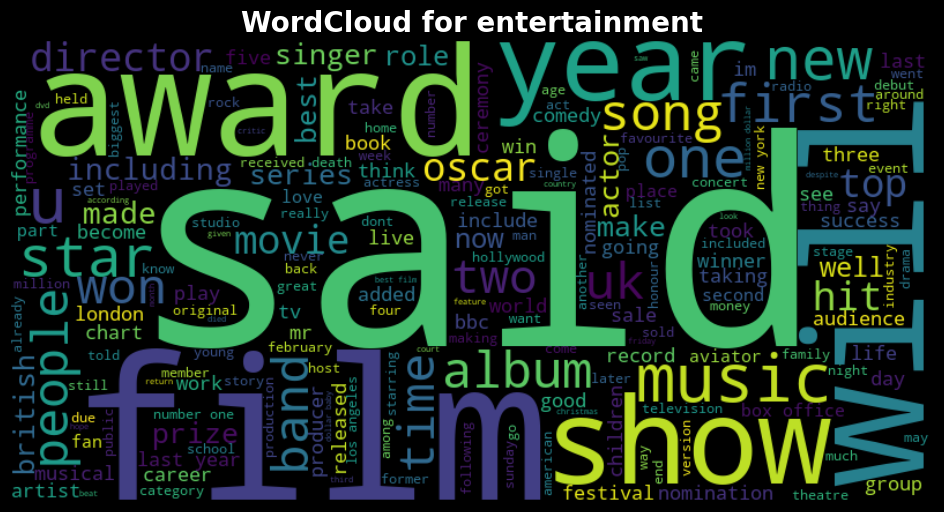

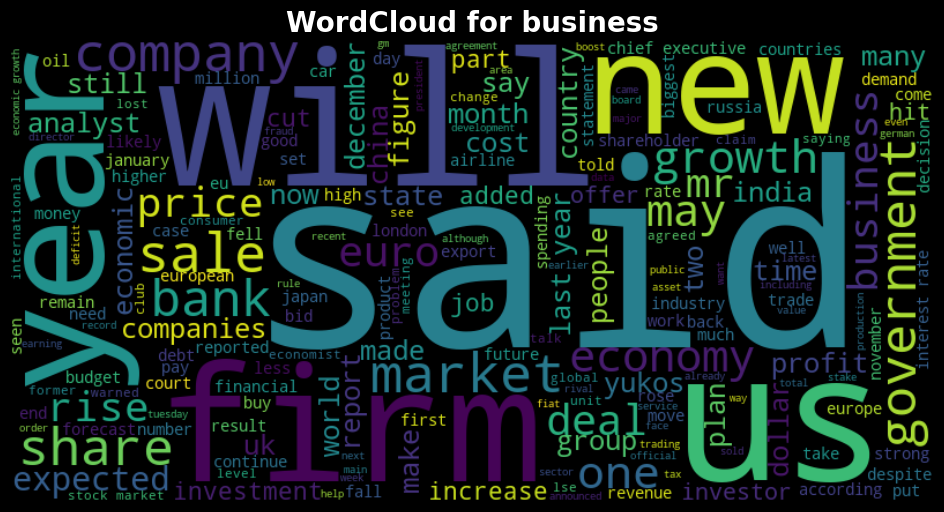

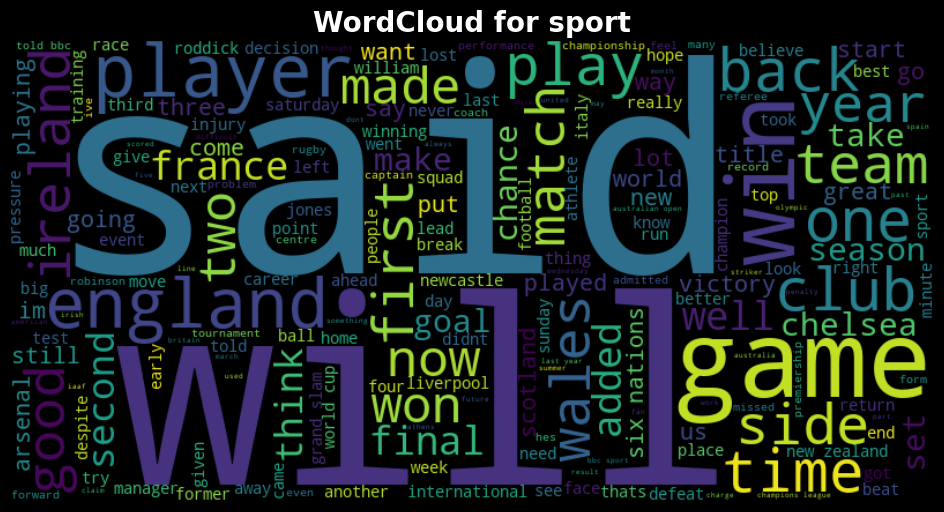

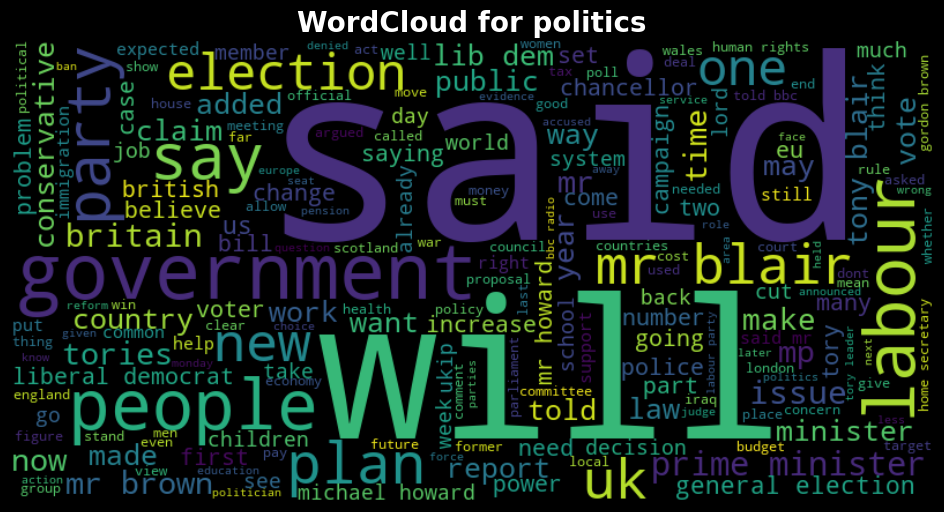

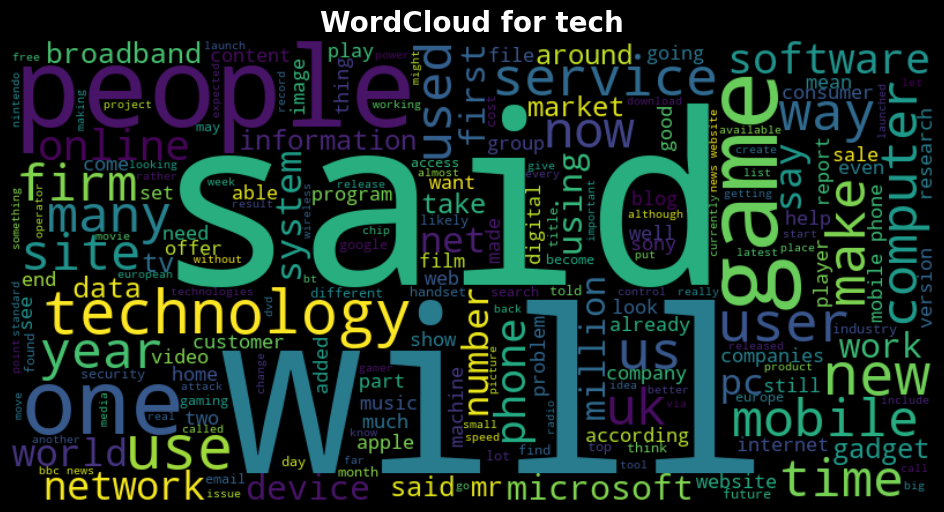

In [76]:
plt.style.use('dark_background')

for category in df['label'].unique():
    # Filter rows for the current category
    category_rows = df[df['label'] == category]

    # Extract text column and convert to list
    text_list = category_rows['cleaned_text'].tolist()

    # Join all text entries into one string
    text = ' '.join(text_list)

    # Generate WordCloud
    wc = WordCloud(width=800, height=400, background_color='black').generate(text)

    plt.figure(figsize=(12, 6))

    plt.imshow(wc, interpolation='bilinear')

    plt.title(f"WordCloud for {category}", fontsize=20 , fontweight = 'heavy' , color = '#FFFFFF')

    plt.axis('off')

    plt.show()     


<!-- --- -->

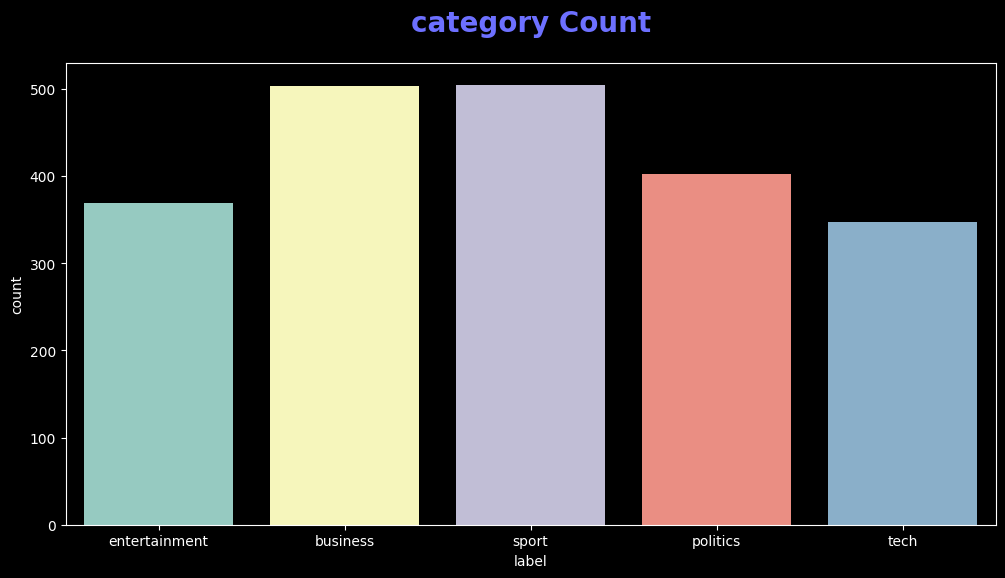

In [87]:
plt.figure(figsize=(12, 6))

sns.countplot(x='label', data=df, palette='Set3', hue = 'label')

plt.title("category Count", fontsize=20 , fontweight = 'heavy' , color = "#6D70FF", y = 1.05)

plt.show()

Saving the cleaned data

In [66]:
save_path = "/Users/sarthaksharna/AutoNews/data/cleaned"

file_path = os.path.join(save_path, "cleaned_data.csv")

os.makedirs(save_path, exist_ok=True)
df.to_csv(file_path, index=False)

print("Saved successfully!")

Saved successfully!
